# Elastic Scattering: Trajectory of Colliding Red and Blue Marbles

In [81]:
import numpy as np 
import math
import matplotlib.pyplot as plt

* x0B = Positions of the red and blue marbles before (B) the collision in a list.
    * x0red = Red marble's initial position
    * x0blud = Blue marble's initial position

In [82]:
x0red = 10
x0blue = -10
x0B = np.array([x0red,x0blue])

* VB = Initial (Before) velocities of red and blue marbles in 1D. 
    * VBred = First entry = red marble velocity
    * vBblue = Second entry = blue marble velocity

In [83]:
vBred = -1.1
vBblue = 1.8

In [84]:
vB = np.array([vBred,vBblue])

* Masses
    * mr = red marble mass
    * mb = blue marble mass

In [85]:
mr = 1
mb = 3

In [86]:
# Useful combinations for setting up the mass matrix
msum = mr + mb
mdiff = mr - mb

In [87]:
# Mass matrix needed to convert initial velocities to final velocities 
Mass_matrix = np.array( ((mdiff/msum,2*mb/msum),(2*mr/msum,-mdiff/msum)) )

In [88]:
print(Mass_matrix)

[[-0.5  1.5]
 [ 0.5  0.5]]


In [89]:
# The list of final velocities (after velocities) is the mass matrix product with the before velocity.
vA = np.dot(Mass_matrix,vB)

In [90]:
print('Velocity of Red Marble After Collision=',vA[0])
print('Velocity of Blue Marble After Collision=',vA[1])

Velocity of Red Marble After Collision= 3.25
Velocity of Blue Marble After Collision= 0.35


In [91]:
# Function for getting the positions of constant velocity marbles in 1D, given list of initial positions (x00), 
# initial velocities (vBB) and a time. 
def the_pos(x00,vBB,t):
    return x00 + vBB*t

In [92]:
# Find the time from start (t=0) when the collision takes place
coll_time = (x0B[0]-x0B[1])/(vB[1]-vB[0])
print('Clock Time At The Collision =',coll_time,"sec")

Clock Time At The Collision = 6.896551724137931 sec


In [93]:
# Use this to get the position where the collision takes place
coll_pos = x0B + vB*coll_time 

In [94]:
coll_pos

array([2.4137931, 2.4137931])

In [95]:
stepsize = coll_time/100.0
t1 = np.arange(0.0,coll_time, stepsize)
t2 = np.arange(coll_time-stepsize,2*coll_time, stepsize)
red_pos = []
blue_pos = []
red_posA= []
blue_posA = []
for t in t1:
    red_pos = np.append(red_pos,the_pos(x0B,vB,t)[0])
for t in t1:
    blue_pos = np.append(blue_pos,the_pos(x0B,vB,t)[1])
for t in t2:
    red_posA = np.append(red_posA,the_pos(coll_pos[0]-vA[0]*coll_time,vA,t)[0])
for t in t2:
    blue_posA = np.append(blue_posA,the_pos(coll_pos[1]-vA[1]*coll_time,vA,t)[1])

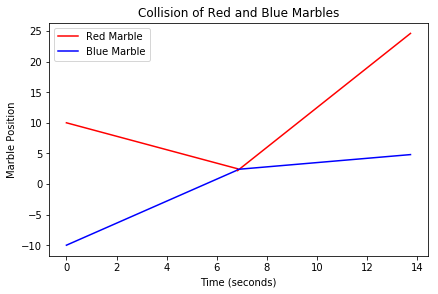

In [96]:
plt.plot(t1,red_pos,'r')
plt.plot(t1,blue_pos,'b')
plt.plot(t2,red_posA,'r')
plt.plot(t2,blue_posA,'b')
plt.title('Collision of Red and Blue Marbles')
plt.xlabel('Time (seconds)')
plt.ylabel('Marble Position')
plt.legend(['Red Marble','Blue Marble'])

plt.tight_layout(pad=0.4, w_pad=6.5, h_pad=1.0)
# Save this figure
plt.savefig('./marbles.pdf',bbox_inches='tight')